In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import os
import gzip

In [2]:
df=pd.read_csv("C:\\reviews_Movies_and_TV_5.csv")

# 1.Phân tích dữ liệu

In [3]:
df.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,0,ADZPIG9QOCDG5,0005019281,"Alice L. Larson ""alice-loves-books""","[0, 0]",This is a charming version of the classic Dick...,4.0,good version of a classic,1203984000,"02 26, 2008"
1,1,A35947ZP82G7JH,0005019281,Amarah Strack,"[0, 0]",It was good but not as emotionally moving as t...,3.0,Good but not as moving,1388361600,"12 30, 2013"
2,2,A3UORV8A9D5L2E,0005019281,Amazon Customer,"[0, 0]","Don't get me wrong, Winkler is a wonderful cha...",3.0,Winkler's Performance was ok at best!,1388361600,"12 30, 2013"
3,3,A1VKW06X1O2X7V,0005019281,"Amazon Customer ""Softmill""","[0, 0]",Henry Winkler is very good in this twist on th...,5.0,It's an enjoyable twist on the classic story,1202860800,"02 13, 2008"
4,4,A3R27T4HADWFFJ,0005019281,BABE,"[0, 0]",This is one of the best Scrooge movies out. H...,4.0,Best Scrooge yet,1387670400,"12 22, 2013"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697533 entries, 0 to 1697532
Data columns (total 10 columns):
Unnamed: 0        int64
reviewerID        object
asin              object
reviewerName      object
helpful           object
reviewText        object
overall           float64
summary           object
unixReviewTime    int64
reviewTime        object
dtypes: float64(1), int64(2), object(7)
memory usage: 129.5+ MB


In [5]:
pd.isnull(df).sum()

Unnamed: 0           0
reviewerID           0
asin                 0
reviewerName      6166
helpful              0
reviewText          62
overall              0
summary             25
unixReviewTime       0
reviewTime           0
dtype: int64

In [72]:
df.describe()

,Unnamed: 0,overall,unixReviewTime
count,1.697533e+06,1.697533e+06,1.697533e+06
mean,8.487660e+05,4.110648e+00,1.262422e+09
std,4.900357e+05,1.197615e+00,1.289277e+08
min,0.000000e+00,1.000000e+00,8.793792e+08
25%,4.243830e+05,4.000000e+00,1.164413e+09
50%,8.487660e+05,5.000000e+00,1.307491e+09
75%,1.273149e+06,5.000000e+00,1.373242e+09
max,1.697532e+06,5.000000e+00,1.406074e+09


In [6]:
data=data = df[['reviewText','summary','overall']]

In [7]:
pd.isnull(df).sum()

Unnamed: 0           0
reviewerID           0
asin                 0
reviewerName      6166
helpful              0
reviewText          62
overall              0
summary             25
unixReviewTime       0
reviewTime           0
dtype: int64

In [8]:
data.shape

(1697533, 3)

In [9]:
data=data[data.reviewText.notnull()]

In [10]:
data=data[data.summary.notnull()]

In [11]:
pd.isnull(data).sum()

reviewText    0
summary       0
overall       0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1697446 entries, 0 to 1697532
Data columns (total 3 columns):
reviewText    object
summary       object
overall       float64
dtypes: float64(1), object(2)
memory usage: 51.8+ MB


In [13]:
data[['overall']] = data[['overall']].astype(str)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1697446 entries, 0 to 1697532
Data columns (total 3 columns):
reviewText    object
summary       object
overall       object
dtypes: object(3)
memory usage: 51.8+ MB


In [15]:
def PhanLoai(pl):
    kq = "";
    if pl== '1.0'or pl=='2.0':
        kq = "negative"
    elif pl=='3.0':   
        kq = "neural"
    else:
        kq = "positive"
    return kq

In [16]:
for i in range(len(data)):
    data.iat[i,2]=PhanLoai(data.iat[i,2])

In [17]:
data.head(5)

,reviewText,summary,overall
0,This is a charming version of the classic Dick...,good version of a classic,positive
1,It was good but not as emotionally moving as t...,Good but not as moving,neural
2,"Don't get me wrong, Winkler is a wonderful cha...",Winkler's Performance was ok at best!,neural
3,Henry Winkler is very good in this twist on th...,It's an enjoyable twist on the classic story,positive
4,This is one of the best Scrooge movies out. H...,Best Scrooge yet,positive


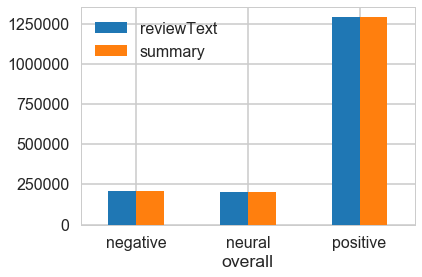

In [70]:
 # Biểu đồ thể hiện số lượng positive, neural, negative ở cột overall
data.groupby('overall').count().plot.bar(rot=0)
plt.show()

Positive cao hơn rất nhiều so với neural và negative
    Positive chiến 76%
    neural chiếm 12%
    negative chiếm 12%

In [71]:
data.overall.value_counts()

positive    1289537
negative     206616
neural       201293
Name: overall, dtype: int64

In [18]:
#Chia tập dữ liệu với các loại 'negative', 'neural', positive' để kiểm tra sự chính xác
negative_test = data[data['overall'] == "negative"]
neural_test = data[data['overall'] == "neural"]
positive_test = data[data['overall'] == "positive"]

# 2. Phân tích dữ liệu giữa reviewText với overall

## a. Training và test với Naive bayes

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import sklearn

In [21]:
X_trainM, X_testM, y_trainM, y_testM = train_test_split(data.reviewText, data.overall, test_size=0.2, random_state=100) 

In [22]:
count_vectM = CountVectorizer(stop_words='english')
X_train_counts_M = count_vectM.fit_transform(X_trainM)

In [23]:
clfM = MultinomialNB().fit(X_train_counts_M, y_trainM)
X_test_counts_M = count_vectM.transform(X_testM)
y_predTestM = clfM.predict(X_test_counts_M)
print('Độ chính xác của tập test "reviewText": {:.2f}%'.format(sklearn.metrics.accuracy_score(y_testM, y_predTestM)*100))

Độ chính xác của tập test "reviewText": 79.24%


In [24]:
#Kiểm tra độ chính xác từng lớp
X_test_negative = count_vectM.transform(negative_test.reviewText)
X_test_neural = count_vectM.transform(neural_test.reviewText)
X_test_positive = count_vectM.transform(positive_test.reviewText)
print('Độ chính xác của tập test_negative "reviewText": {:.2f}%'.format(sklearn.metrics.accuracy_score(negative_test.overall, clfM.predict(X_test_negative))*100))
print('Độ chính xác của tập test_neural "reviewText": {:.2f}%'.format(sklearn.metrics.accuracy_score(neural_test.overall, clfM.predict(X_test_neural))*100))
print('Độ chính xác của tập test_positive "reviewText": {:.2f}%'.format(sklearn.metrics.accuracy_score(positive_test.overall, clfM.predict(X_test_positive))*100))

Độ chính xác của tập test_negative "reviewText": 68.92%
Độ chính xác của tập test_neural "reviewText": 29.49%
Độ chính xác của tập test_positive "reviewText": 90.31%


In [25]:
for i in range(1,40,3):
    clfM1 = MultinomialNB(alpha=i/10).fit(X_train_counts_M, y_trainM)
    X_test_counts_M1 = count_vectM.transform(X_testM)
    y_predTestM1 = clfM1.predict(X_test_counts_M1)
    print('Độ chính xác của tập test "summary": {:.2f}%'.format(sklearn.metrics.accuracy_score(y_testM, y_predTestM1)*100),"alpha: ", i/10)

Độ chính xác của tập test "summary": 76.75% alpha:  0.1
Độ chính xác của tập test "summary": 77.66% alpha:  0.4
Độ chính xác của tập test "summary": 78.50% alpha:  0.7
Độ chính xác của tập test "summary": 79.24% alpha:  1.0
Độ chính xác của tập test "summary": 79.83% alpha:  1.3
Độ chính xác của tập test "summary": 80.26% alpha:  1.6
Độ chính xác của tập test "summary": 80.55% alpha:  1.9
Độ chính xác của tập test "summary": 80.76% alpha:  2.2
Độ chính xác của tập test "summary": 80.85% alpha:  2.5
Độ chính xác của tập test "summary": 80.87% alpha:  2.8
Độ chính xác của tập test "summary": 80.81% alpha:  3.1
Độ chính xác của tập test "summary": 80.72% alpha:  3.4
Độ chính xác của tập test "summary": 80.58% alpha:  3.7


Với alpha bằng 2.8 sẽ cho kết quả tốt nhất

## b. Training và test sử dụng tfidf và Naive bayes

### - Mã hóa dữ liệu dạng Text sang Vector (Text to vector)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
count_vect = CountVectorizer()

In [28]:
X_train_counts = count_vect.fit_transform(data.reviewText)

### - Chuyển Vector sang tf-idf

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer

In [30]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(1697446, 815655)

### - Training và test (reviewText và overall) với phân lớp Naive Bayes

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import sklearn

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X_train_tfidf, data.overall, test_size = 0.20, random_state = 100)

In [33]:
clf = MultinomialNB(alpha=.01).fit(x_train, y_train)

In [34]:
#Độ chính xác của tập Train
y_predTrain = clf.predict(x_train)
print('Độ chính xác của tập train "reviewText": {:.2f}%'.format(sklearn.metrics.accuracy_score(y_train, y_predTrain)*100))
accreviewTextTrain=sklearn.metrics.accuracy_score(y_train, y_predTrain)*100

Độ chính xác của tập train "reviewText": 81.92%


In [37]:
#Độ chính xác của tập text
y_predTest = clf.predict(x_test)
print('Độ chính xác của tập test "reviewText": {:.2f}%'.format(sklearn.metrics.accuracy_score(y_test, y_predTest)*100))
accreviewTextTest=sklearn.metrics.accuracy_score(y_test, y_predTest)*100

Độ chính xác của tập test "reviewText": 78.60%


In [39]:
for i in range(1,40,3):
    clf_tfidf = MultinomialNB(alpha=i/10).fit(x_train, y_train)
    y_predTest_tfidf = clf_tfidf.predict(x_test)
    print('Độ chính xác của tập test "reviewText": {:.2f}%'.format(sklearn.metrics.accuracy_score(y_test, y_predTest_tfidf)*100),"alpha: ", i/10)

Độ chính xác của tập test "reviewText": 77.86% alpha:  0.1
Độ chính xác của tập test "reviewText": 76.41% alpha:  0.4
Độ chính xác của tập test "reviewText": 76.03% alpha:  0.7
Độ chính xác của tập test "reviewText": 75.93% alpha:  1.0
Độ chính xác của tập test "reviewText": 75.91% alpha:  1.3
Độ chính xác của tập test "reviewText": 75.90% alpha:  1.6
Độ chính xác của tập test "reviewText": 75.90% alpha:  1.9
Độ chính xác của tập test "reviewText": 75.91% alpha:  2.2
Độ chính xác của tập test "reviewText": 75.91% alpha:  2.5
Độ chính xác của tập test "reviewText": 75.91% alpha:  2.8
Độ chính xác của tập test "reviewText": 75.91% alpha:  3.1
Độ chính xác của tập test "reviewText": 75.91% alpha:  3.4
Độ chính xác của tập test "reviewText": 75.91% alpha:  3.7


## c. tfidf và Naive bayes

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import sklearn

In [42]:
vectorizerN = TfidfVectorizer(sublinear_tf=True, max_df=0.5,stop_words='english')

In [43]:
x_trainN, x_testN, y_trainN, y_testN = train_test_split(data.reviewText, data.overall, test_size = 0.20, random_state = 100)

In [44]:
X_trainN = vectorizerN.fit_transform(x_trainN)
X_testN = vectorizerN.transform(x_testN)

In [45]:
clfN = MultinomialNB(alpha=.01).fit(X_trainN, y_trainN)

In [46]:
y_predTrainN = clfN.predict(X_trainN)
print('Độ chính xác của tập train "reviewText": {:.2f}%'.format(sklearn.metrics.accuracy_score(y_trainN, y_predTrainN)*100))
accreviewTextTrainN=sklearn.metrics.accuracy_score(y_trainN, y_predTrainN)*100

Độ chính xác của tập train "reviewText": 82.86%


In [47]:
#Độ chính xác của tập text
y_predTestN = clfN.predict(X_testN)
print('Độ chính xác của tập test "reviewText": {:.2f}%'.format(sklearn.metrics.accuracy_score(y_testN, y_predTestN)*100))
accreviewTextTestN=sklearn.metrics.accuracy_score(y_testN, y_predTestN)*100

Độ chính xác của tập test "reviewText": 78.95%


In [85]:
for i in range(1,10,3):
    clfN1 = MultinomialNB(alpha=i/10).fit(X_trainN, y_trainN)
    y_predTest_N1 = clfN1.predict(X_testN)
    #print("acc: ",np.mean(y_predTest_Summary1 == y_testSummary),"alpha= ", i/10) 
    print('Độ chính xác của tập test "summary": {:.2f}%'.format(sklearn.metrics.accuracy_score(y_testN,  y_predTest_N1)*100),"alpha: ", i/10)

Độ chính xác của tập test "summary": 78.50% alpha:  0.1
Độ chính xác của tập test "summary": 76.93% alpha:  0.4
Độ chính xác của tập test "summary": 76.34% alpha:  0.7


# 3. Phân tích dữ liệu giữa summary với overall

## a. Training và test với Naive bayes

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import sklearn

In [52]:
X_trainSummary, X_testSummary, y_trainSummary, y_testSummary = train_test_split(data.summary, data.overall, test_size=0.2, random_state=100) 

In [53]:
count_vectSummary = CountVectorizer(stop_words='english')
X_train_counts_Summary = count_vectSummary.fit_transform(X_trainSummary)

In [54]:
clfSummary = MultinomialNB().fit(X_train_counts_Summary, y_trainSummary)
X_test_counts_Summary = count_vectSummary.transform(X_testSummary)
y_predTestSummary = clfSummary.predict(X_test_counts_Summary)
print('Độ chính xác của tập test "reviewText": {:.2f}%'.format(sklearn.metrics.accuracy_score(y_testSummary, y_predTestSummary)*100))

Độ chính xác của tập test "reviewText": 79.86%


In [55]:
#Kiểm tra độ chính xác từng lớp
X_test_negative_Summary = count_vectSummary.transform(negative_test.summary)
X_test_neural_Summary = count_vectSummary.transform(neural_test.summary)
X_test_positive_Summary = count_vectSummary.transform(positive_test.summary)
print('Độ chính xác của tập test_negative "reviewText": {:.2f}%'.format(sklearn.metrics.accuracy_score(negative_test.overall, clfSummary.predict(X_test_negative_Summary))*100))
print('Độ chính xác của tập test_neural "reviewText": {:.2f}%'.format(sklearn.metrics.accuracy_score(neural_test.overall, clfSummary.predict(X_test_neural_Summary))*100))
print('Độ chính xác của tập test_positive "reviewText": {:.2f}%'.format(sklearn.metrics.accuracy_score(positive_test.overall, clfSummary.predict(X_test_positive_Summary))*100))

Độ chính xác của tập test_negative "reviewText": 44.42%
Độ chính xác của tập test_neural "reviewText": 19.00%
Độ chính xác của tập test_positive "reviewText": 96.41%


In [56]:
for i in range(1,30,2):
    clfSummary1 = MultinomialNB(alpha=i/10).fit(X_train_counts_Summary, y_trainSummary)
    X_test_counts_Summary1 = count_vectSummary.transform(X_testSummary)
    y_predTest_Summary1 = clfSummary1.predict(X_test_counts_Summary1)
    #print("acc: ",np.mean(y_predTest_Summary1 == y_testSummary),"alpha= ", i/10) 
    print('Độ chính xác của tập test "summary": {:.2f}%'.format(sklearn.metrics.accuracy_score(y_testSummary, y_predTest_Summary1)*100),"alpha: ", i/10)

Độ chính xác của tập test "summary": 79.56% alpha:  0.1
Độ chính xác của tập test "summary": 79.67% alpha:  0.3
Độ chính xác của tập test "summary": 79.72% alpha:  0.5
Độ chính xác của tập test "summary": 79.77% alpha:  0.7
Độ chính xác của tập test "summary": 79.84% alpha:  0.9
Độ chính xác của tập test "summary": 79.87% alpha:  1.1
Độ chính xác của tập test "summary": 79.90% alpha:  1.3
Độ chính xác của tập test "summary": 79.91% alpha:  1.5
Độ chính xác của tập test "summary": 79.92% alpha:  1.7
Độ chính xác của tập test "summary": 79.91% alpha:  1.9
Độ chính xác của tập test "summary": 79.92% alpha:  2.1
Độ chính xác của tập test "summary": 79.92% alpha:  2.3
Độ chính xác của tập test "summary": 79.93% alpha:  2.5
Độ chính xác của tập test "summary": 79.92% alpha:  2.7
Độ chính xác của tập test "summary": 79.89% alpha:  2.9


## b. Training và test sử dụng tfidf và Naive bayes

###- Mã hóa dữ liệu dạng Text sang Vector (Text to vector)

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
count_vectSum = CountVectorizer()

In [59]:
X_train_countsSum = count_vectSum.fit_transform(data.summary)

### - Chuyển Vector sang tf-idf

In [60]:
from sklearn.feature_extraction.text import TfidfTransformer

In [61]:
tfidf_transformerSum = TfidfTransformer()
X_train_tfidfSum = tfidf_transformerSum.fit_transform(X_train_countsSum)
X_train_tfidfSum.shape

(1697446, 101744)

### -Training và test (summary và overall) với phân lớp Naive Bayes

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import sklearn

In [63]:
x_trainSum, x_testSum, y_trainSum, y_testSum = train_test_split(X_train_tfidfSum, data.overall, test_size = 0.20, random_state = 100)

In [64]:
clfSum = MultinomialNB(alpha=.04).fit(x_trainSum, y_trainSum)

In [65]:
#Độ chính xác của tập Train
y_predTrainSum = clfSum.predict(x_trainSum)
print('Độ chính xác của tập train "summary": {:.2f}%'.format(sklearn.metrics.accuracy_score(y_trainSum, y_predTrainSum)*100))
accsummaryTrain=sklearn.metrics.accuracy_score(y_trainSum, y_predTrainSum)*100

Độ chính xác của tập train "summary": 81.62%


In [66]:
#Độ chính xác của tập text
y_predTestSum = clfSum.predict(x_testSum)
print('Độ chính xác của tập test "summary": {:.2f}%'.format(sklearn.metrics.accuracy_score(y_testSum, y_predTestSum)*100))
accsummaryTest=sklearn.metrics.accuracy_score(y_testSum, y_predTestSum)*100

Độ chính xác của tập test "summary": 79.69%


# 4. Biến đổi dữ liệu reviewText

In [ ]:
from sklearn import preprocessing

In [ ]:
data['reviewLength'] = data.apply(lambda x: len(x['reviewText']), axis=1)

In [ ]:
data['overalNew'] =df[['overall']]

In [ ]:
data.head()

In [ ]:
#Xét mối tương quan giữa các giá trị
fig, ax = plt.subplots(figsize=(5, 5))
corrmat = data.corr()
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()
corrmat

In [ ]:
X_dieuChinh = preprocessing.Normalizer().fit_transform(data['reviewLength'])